<a href="https://colab.research.google.com/github/jhancp/jhancp/blob/main/Prediccion_VHC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TRABAJO FINAL**
###**AUTOR: CAYA PÉREZ JHAN CARLOS**

La base de datos presentada cuenta con datos relacionados a la fibrosis hepática por VHC (Virus de la Hepatitis C).La cual fue obtenida del siguiente repositorio:
https://archive.ics.uci.edu/ml/datasets/HCV+data

#**OBJETIVO**

Detectar si un donante puede estar contagiado de VHC 













# **1. Importación de librerias**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#librerias para imputacion y reporte de nulos
import missingno
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


warnings.filterwarnings("ignore")

# **2. Cargar el dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **2.1 Se carga el dataset y se elimina la columna "Unnamed: 0"**

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/hcvdat0.csv")
data.drop(columns="Unnamed: 0", inplace=True)
data.shape

(615, 13)

In [ ]:
data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


#### Se muestra los diferentes estados de salud que contiene nuestra variable "Category"

In [ ]:
data.Category.unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

# **3. Análisis Exploratorio**

## **3.1. Reporte de valores nulos e imputación de datos**

### **3.1.1. Reporte de valores nulos**

In [ ]:
#@title funciones para reporte de nulos

def reporte_nulos(data):
  data_rep_total=data.isna().sum().sort_values(ascending = False)
  data_rep_p=np.round(data.isna().sum().sort_values(ascending = False)/len(data)*100, 3)
  df_n = pd.concat([data_rep_total,data_rep_p], axis=1).reset_index()
  df_n.columns = ["Variable", "Cant. Nulos", "% Nulos"]
  df_n["Cant. Total"] = data.shape[0]

  #Obtención de cantidad de no nulos
  df_n["Cant. No Nulos"] = data.shape[0] - df_n["Cant. Nulos"]
  #Reordenamiento de columnas
  df_n = df_n.reindex(columns=["Variable","Cant. Total","Cant. No Nulos","Cant. Nulos", "% Nulos"])
  print(df_n)

  #Obtención de graficas
  fig = plt.figure(figsize = (10,10))
  ax1 = fig.add_subplot(2,1,1)
  missingno.bar(data, figsize=(10,5), fontsize=12, ax=ax1, color = "tab:green", sort = "ascending")
  print("*"*100)
  ax2 = fig.add_subplot(2,1,2)
  missingno.heatmap(data, cmap="RdYlGn", figsize=(10,5), fontsize=12, ax=ax2)
  plt.show()

    Variable  Cant. Total  Cant. No Nulos  Cant. Nulos  % Nulos
0        ALP          615             597           18    2.927
1       CHOL          615             605           10    1.626
2        ALB          615             614            1    0.163
3        ALT          615             614            1    0.163
4       PROT          615             614            1    0.163
5   Category          615             615            0    0.000
6        Age          615             615            0    0.000
7        Sex          615             615            0    0.000
8        AST          615             615            0    0.000
9        BIL          615             615            0    0.000
10       CHE          615             615            0    0.000
11      CREA          615             615            0    0.000
12       GGT          615             615            0    0.000
****************************************************************************************************


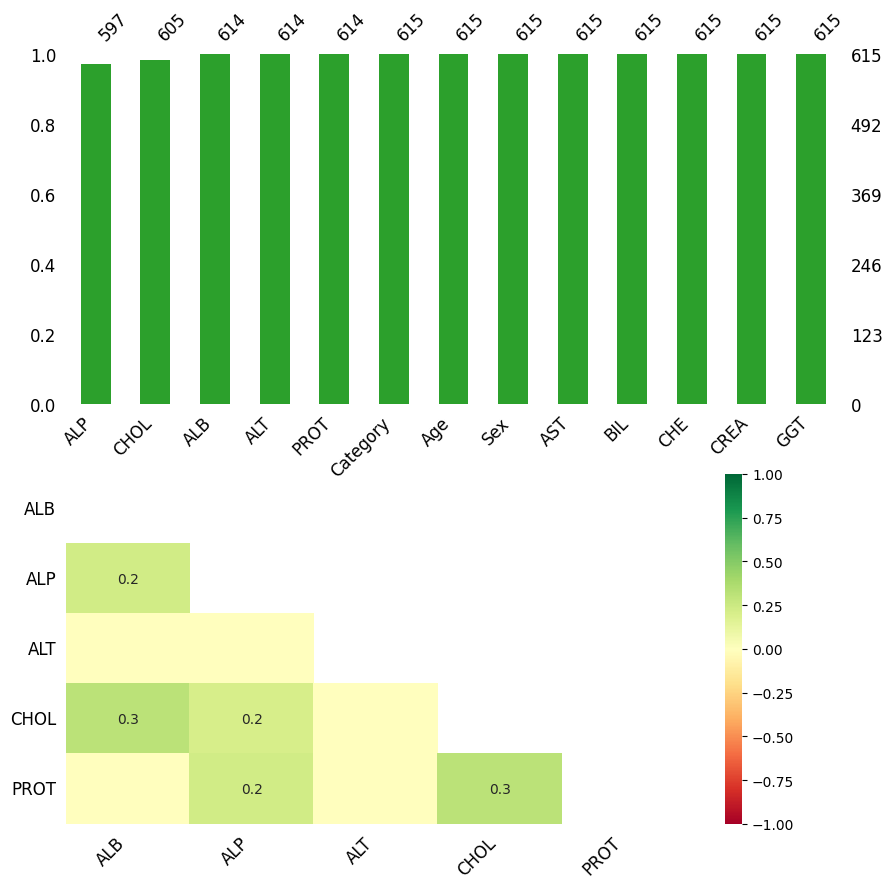

In [ ]:
reporte_nulos(data)

### **3.1.2. Limpieza de datos nulos e imputación**

#### Por los resultados anteriores se conoce que las variables con datos nulos son: ALP, CHOL, ALB, ALT y PROT

#### Se decidió utilizar la función **fillna** para poder reemplazar los datos "nan" por un valor deseado que en este caso fue la media de cada variable

    Variable  Cant. Total  Cant. No Nulos  Cant. Nulos  % Nulos
0   Category          615             615            0      0.0
1        Age          615             615            0      0.0
2        Sex          615             615            0      0.0
3        ALB          615             615            0      0.0
4        ALP          615             615            0      0.0
5        ALT          615             615            0      0.0
6        AST          615             615            0      0.0
7        BIL          615             615            0      0.0
8        CHE          615             615            0      0.0
9       CHOL          615             615            0      0.0
10      CREA          615             615            0      0.0
11       GGT          615             615            0      0.0
12      PROT          615             615            0      0.0
****************************************************************************************************


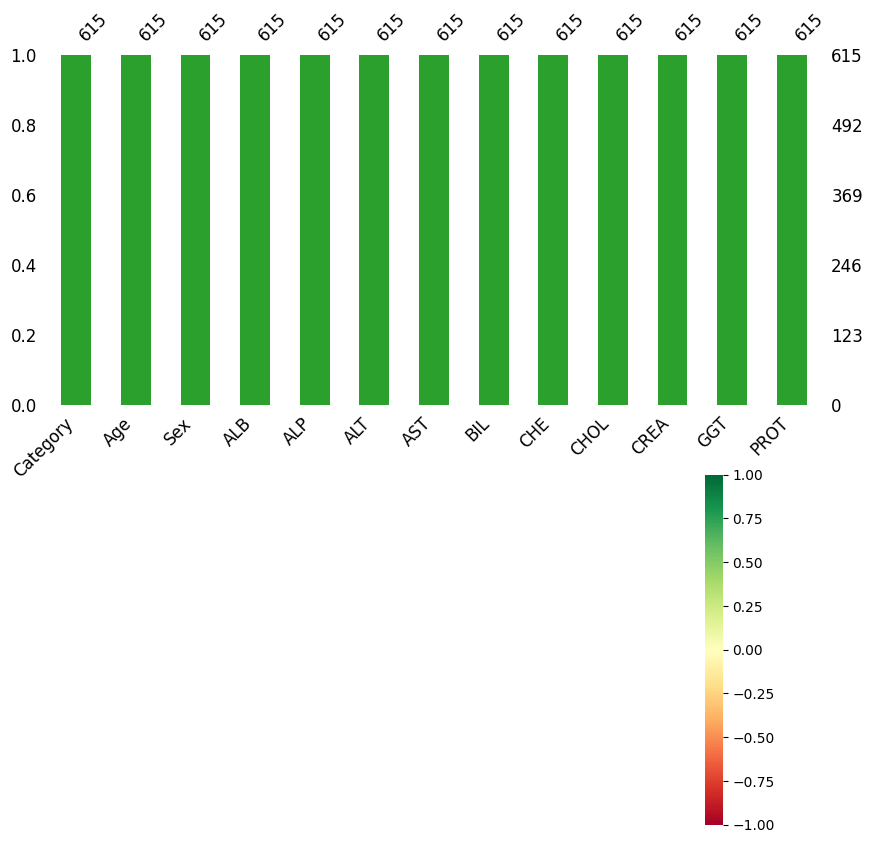

In [ ]:
data.fillna(data.median(),inplace=True)
reporte_nulos(data)


## **3.2. Revisión de datos duplicados**

In [ ]:
bool_dupli = data.duplicated(keep = "first")
len(data[bool_dupli])
print(f"Cantidad de datos duplicados: {len(data[bool_dupli])}")

Cantidad de datos duplicados: 0


### Con esto se concluye que el dataset utilizado no cuenta con datos duplicados

## **3.3. Análisis Univariante**

In [ ]:
#@title Dar formato a las variables categóricas
data['Category'] = data['Category'].map({'0=Blood Donor': 'Saludable', 
                                         '0s=suspect Blood Donor': 'Saludable',
                                         '1=Hepatitis': 'Hepatitis',
                                         '2=Fibrosis': 'Fibrosis',
                                         '3=Cirrhosis': 'Cirrosis'})

data['Sex'] = data['Sex'].map({'m': 'Masculino',
                               'f': 'Femenino'}) 

#Este formato solo sera utilizado para temas visuales

Este formato solo sera utilizado para temas visuales

In [ ]:
data

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,Saludable,32,Masculino,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,Saludable,32,Masculino,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,Saludable,32,Masculino,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,Saludable,32,Masculino,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,Saludable,32,Masculino,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Cirrosis,62,Femenino,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,Cirrosis,64,Femenino,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,Cirrosis,64,Femenino,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,Cirrosis,46,Femenino,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


 ### **3.3.1. análisis univariante de las variables categóricas**

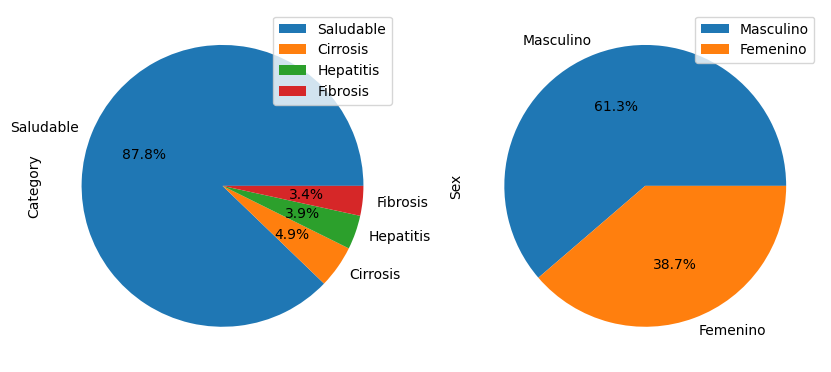

In [ ]:
plt.figure(figsize=(10,20))
plt.subplot(221)
data.Category.value_counts().plot(kind='pie', legend=True,style=list, autopct='%1.1f%%')
plt.subplot(222)
data.Sex.value_counts().plot(kind='pie', legend=True,style=list, autopct='%1.1f%%')

 ### **3.3.2. análisis univariante de las variables numéricas**

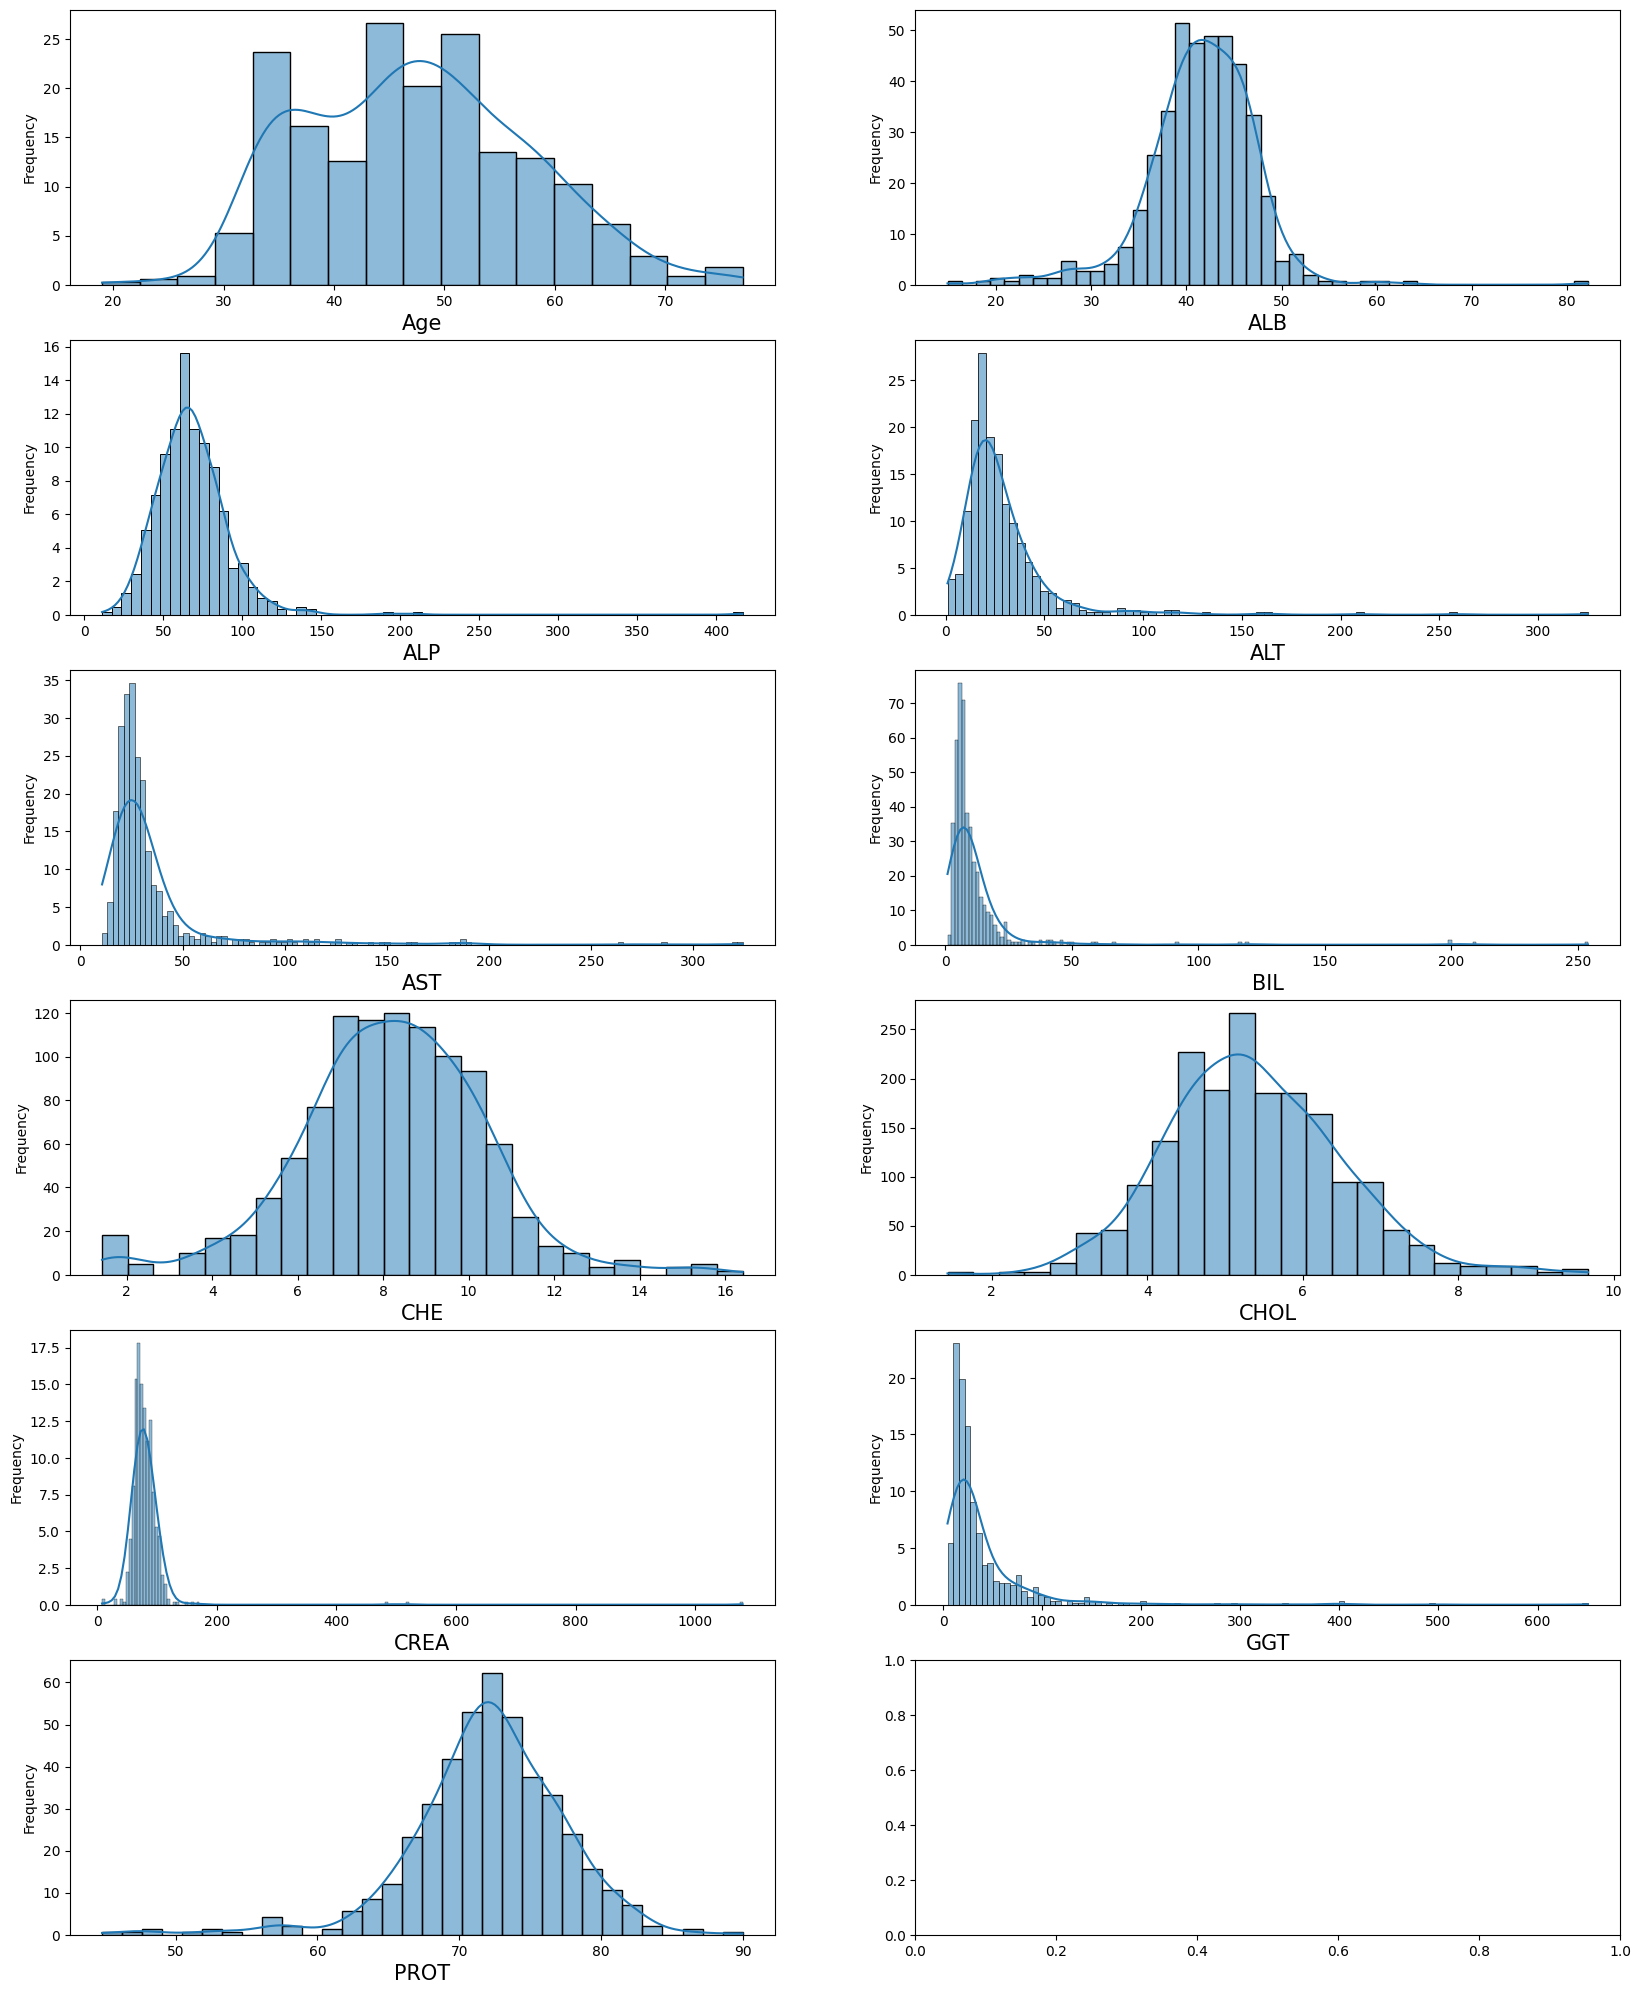

In [ ]:
#@title Histograma de Frecuencias
fig, ax =plt.subplots(6,2, figsize=(20,25)) 
plt.style.use("default")

sns.histplot(x = data["Age"],stat="frequency", kde=True, ax=ax[0,0]);
ax[0,0].set_xlabel("Age",fontsize=15)

sns.histplot(x = data["ALB"],stat="frequency", kde=True, ax=ax[0,1]);
ax[0,1].set_xlabel("ALB",fontsize=15)

sns.histplot(x = data["ALP"],stat="frequency", kde=True, ax=ax[1,0]);
ax[1,0].set_xlabel("ALP",fontsize=15)

sns.histplot(x = data["ALT"],stat="frequency", kde=True, ax=ax[1,1]);
ax[1,1].set_xlabel("ALT",fontsize=15)

sns.histplot(x = data["AST"],stat="frequency", kde=True, ax=ax[2,0]);
ax[2,0].set_xlabel("AST",fontsize=15)

sns.histplot(x = data["BIL"],stat="frequency", kde=True, ax=ax[2,1]);
ax[2,1].set_xlabel("BIL",fontsize=15)

sns.histplot(x = data["CHE"],stat="frequency", kde=True, ax=ax[3,0]);
ax[3,0].set_xlabel("CHE",fontsize=15)

sns.histplot(x = data["CHOL"],stat="frequency", kde=True, ax=ax[3,1]);
ax[3,1].set_xlabel("CHOL",fontsize=15);

sns.histplot(x = data["CREA"],stat="frequency", kde=True, ax=ax[4,0]);
ax[4,0].set_xlabel("CREA",fontsize=15)

sns.histplot(x = data["GGT"],stat="frequency", kde=True, ax=ax[4,1]);
ax[4,1].set_xlabel("GGT",fontsize=15);

sns.histplot(x = data["PROT"],stat="frequency", kde=True, ax=ax[5,0]);
ax[5,0].set_xlabel("PROT",fontsize=15);

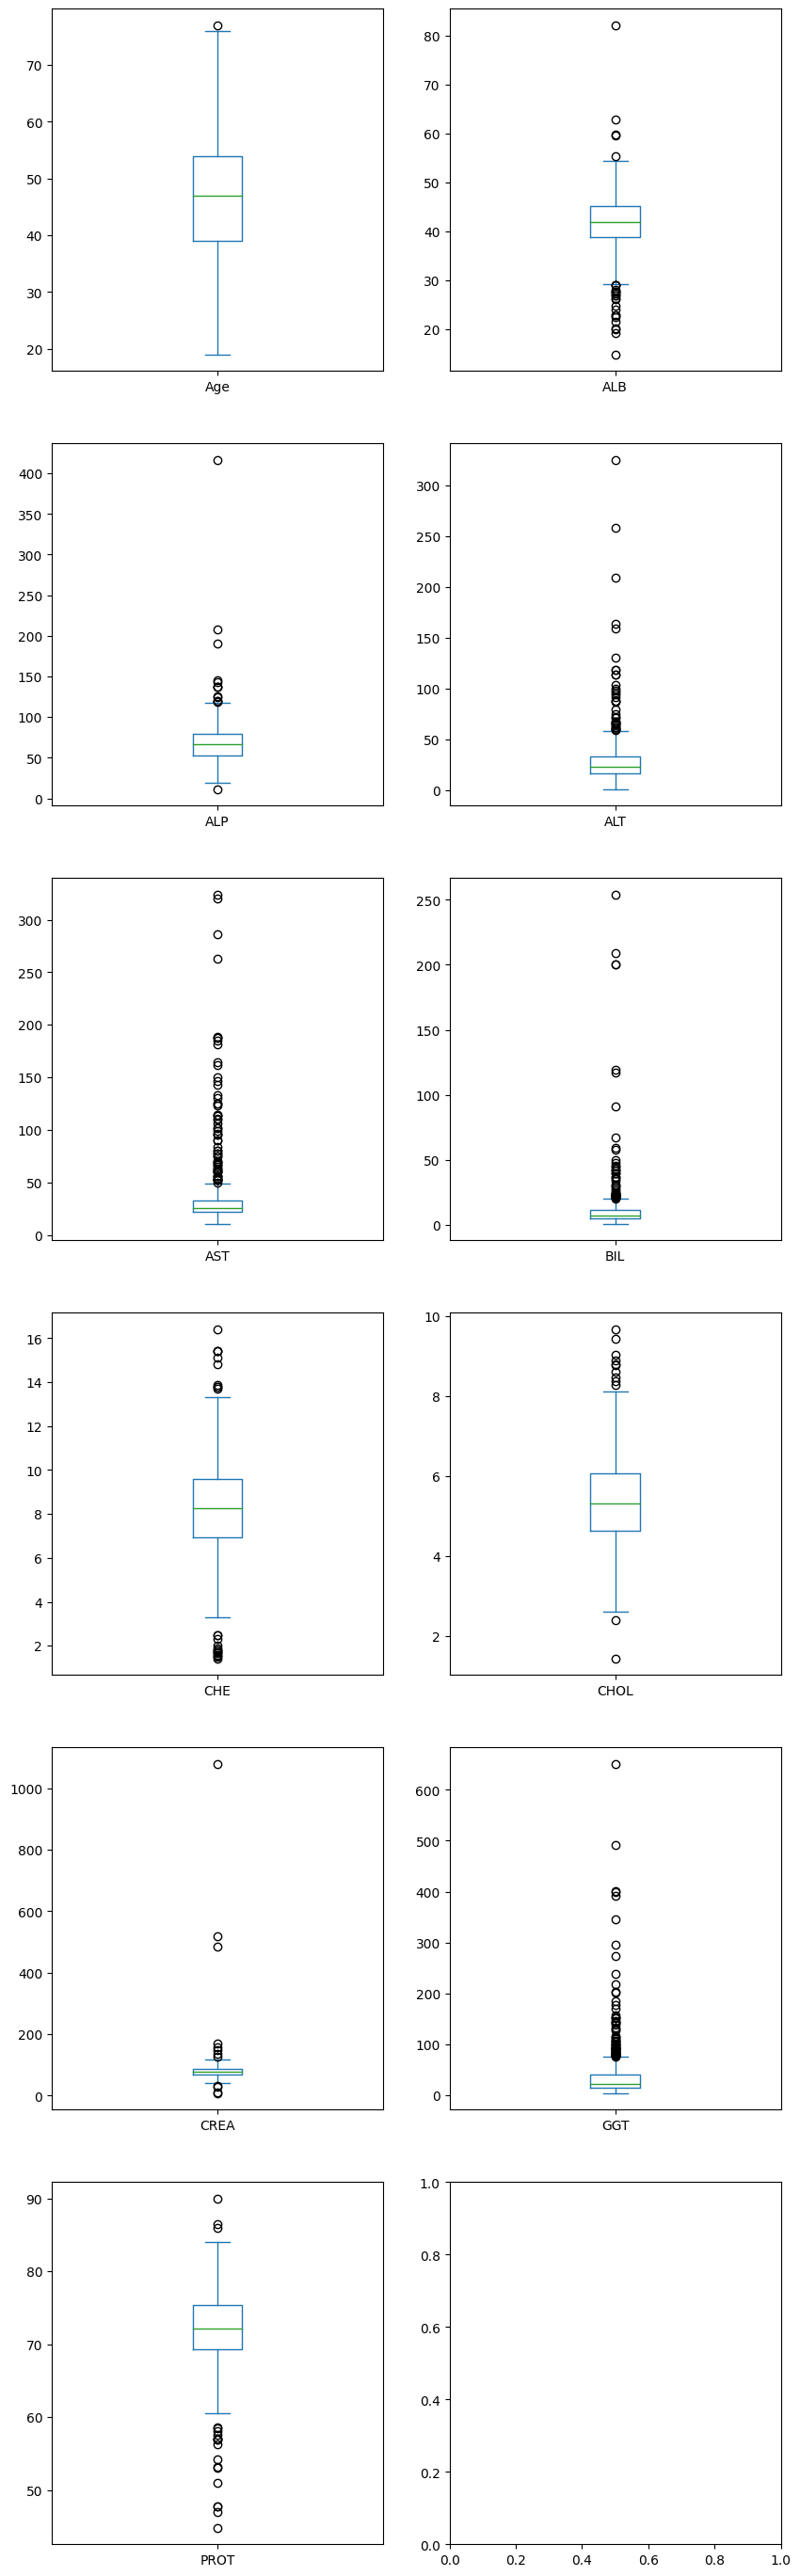

In [ ]:
#@title Diagrama de cajas
fig, axes = plt.subplots(6, 2,figsize=(15,40))
data["Age"].plot.box(figsize=(10,35),ax=axes[0,0])
data["ALB"].plot.box(figsize=(10,35),ax=axes[0,1])
data["ALP"].plot.box(figsize=(10,35),ax=axes[1,0])
data["ALT"].plot.box(figsize=(10,35),ax=axes[1,1])
data["AST"].plot.box(figsize=(10,35),ax=axes[2,0])
data["BIL"].plot.box(figsize=(10,35),ax=axes[2,1])
data["CHE"].plot.box(figsize=(10,35),ax=axes[3,0])
data["CHOL"].plot.box(figsize=(10,35),ax=axes[3,1])
data["CREA"].plot.box(figsize=(10,35),ax=axes[4,0])
data["GGT"].plot.box(figsize=(10,35),ax=axes[4,1])
data["PROT"].plot.box(figsize=(10,35),ax=axes[5,0])

 ### **3.3.3. análisis multivariante de las variables numéricas**

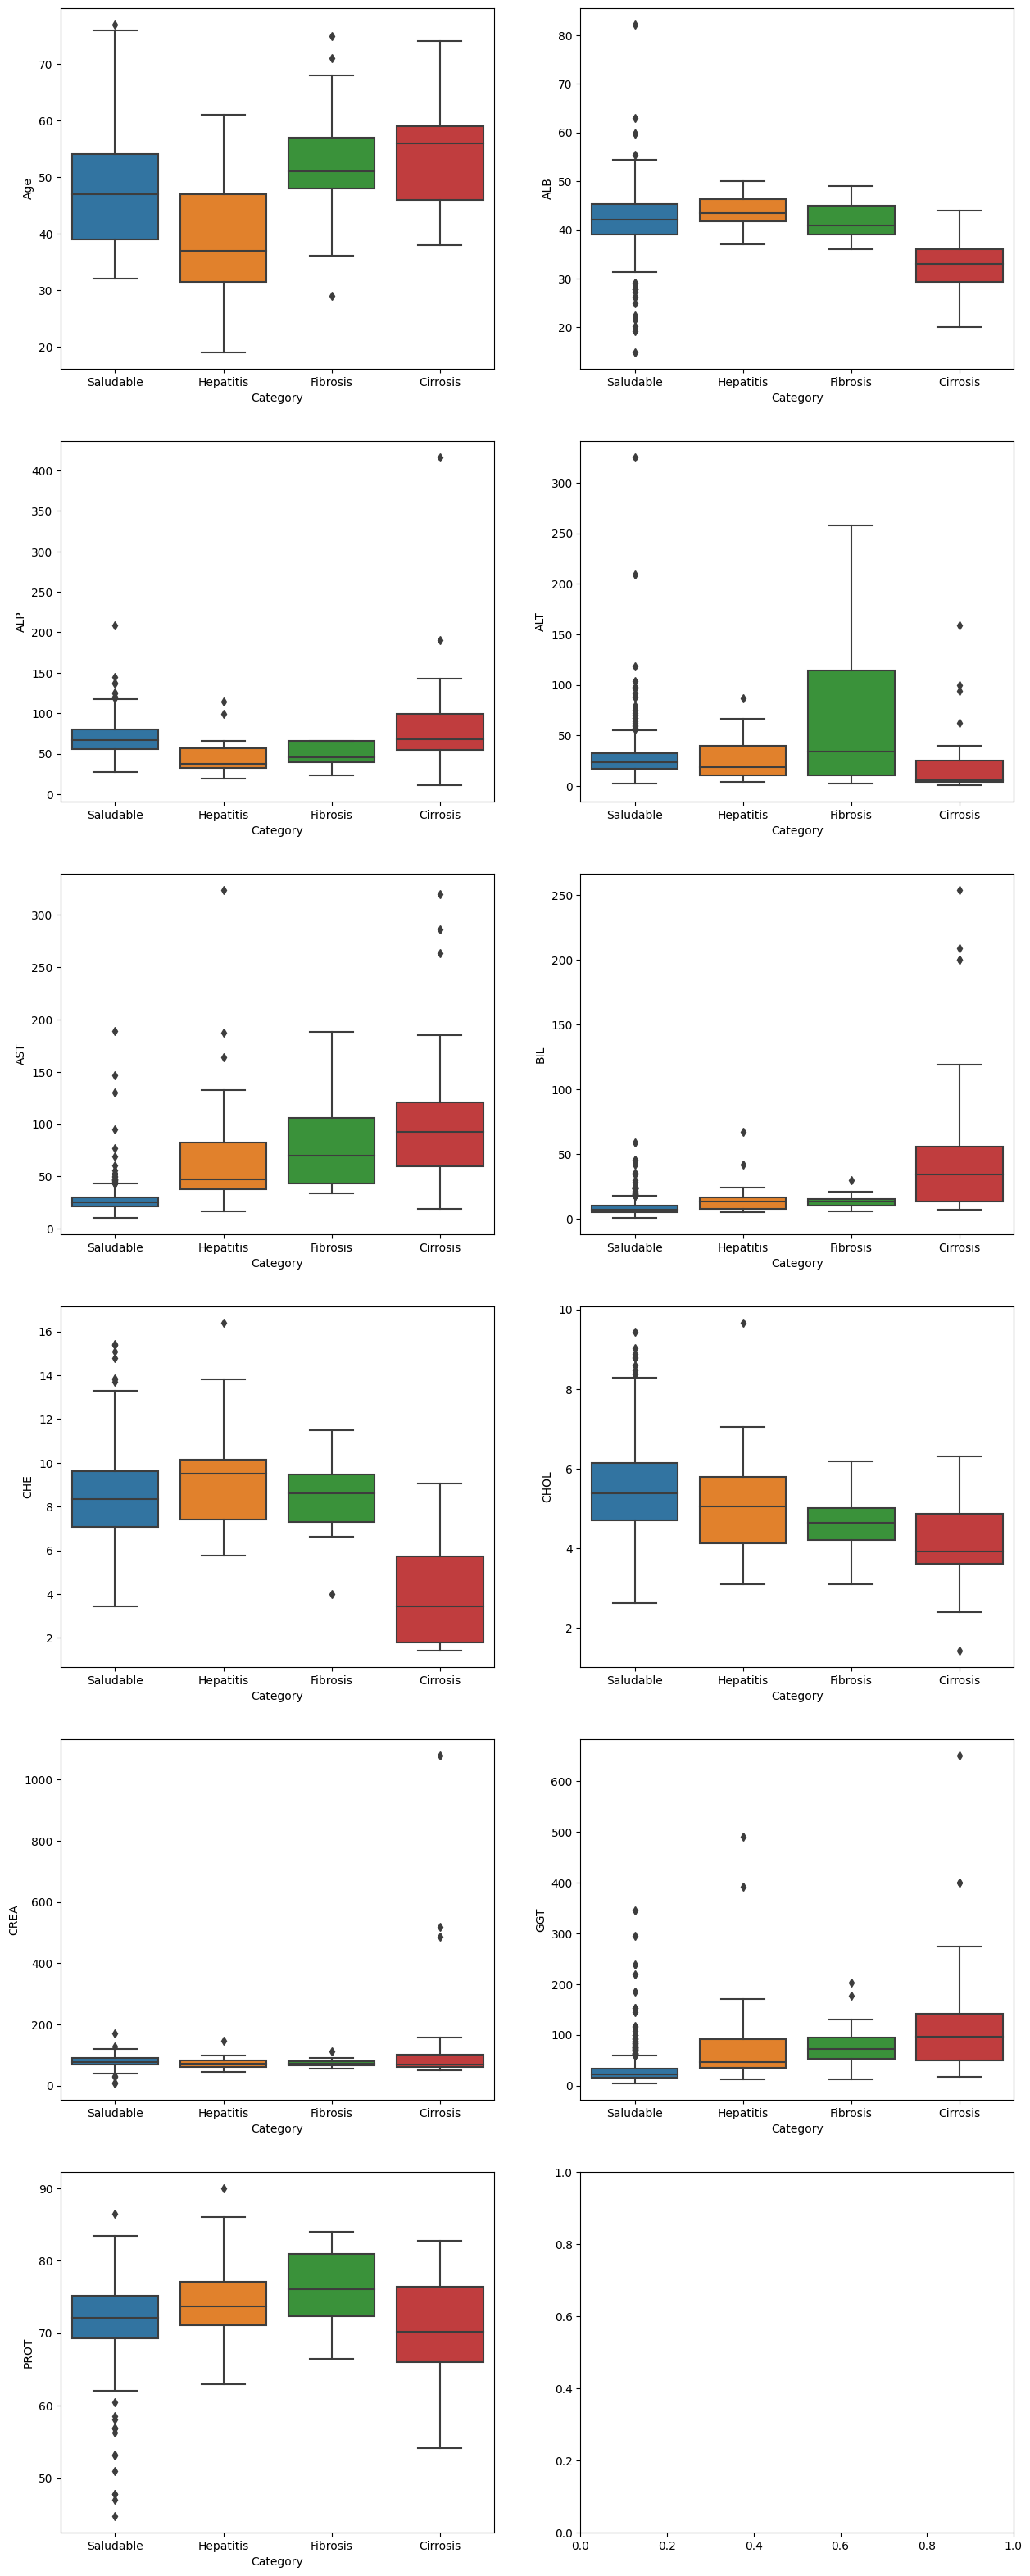

In [ ]:
#@title Diagrama de cajas
fig, axes = plt.subplots(6, 2,figsize=(15,40))
sns.boxplot(data=data, x="Category", y="Age",ax=axes[0,0])
sns.boxplot(data=data, x="Category", y="ALB",ax=axes[0,1])
sns.boxplot(data=data, x="Category", y="ALP",ax=axes[1,0])
sns.boxplot(data=data, x="Category", y="ALT",ax=axes[1,1])
sns.boxplot(data=data, x="Category", y="AST",ax=axes[2,0])
sns.boxplot(data=data, x="Category", y="BIL",ax=axes[2,1])
sns.boxplot(data=data, x="Category", y="CHE",ax=axes[3,0])
sns.boxplot(data=data, x="Category", y="CHOL",ax=axes[3,1])
sns.boxplot(data=data, x="Category", y="CREA",ax=axes[4,0])
sns.boxplot(data=data, x="Category", y="GGT",ax=axes[4,1])
sns.boxplot(data=data, x="Category", y="PROT",ax=axes[5,0])


## **3.4 Análisis de Correlación**


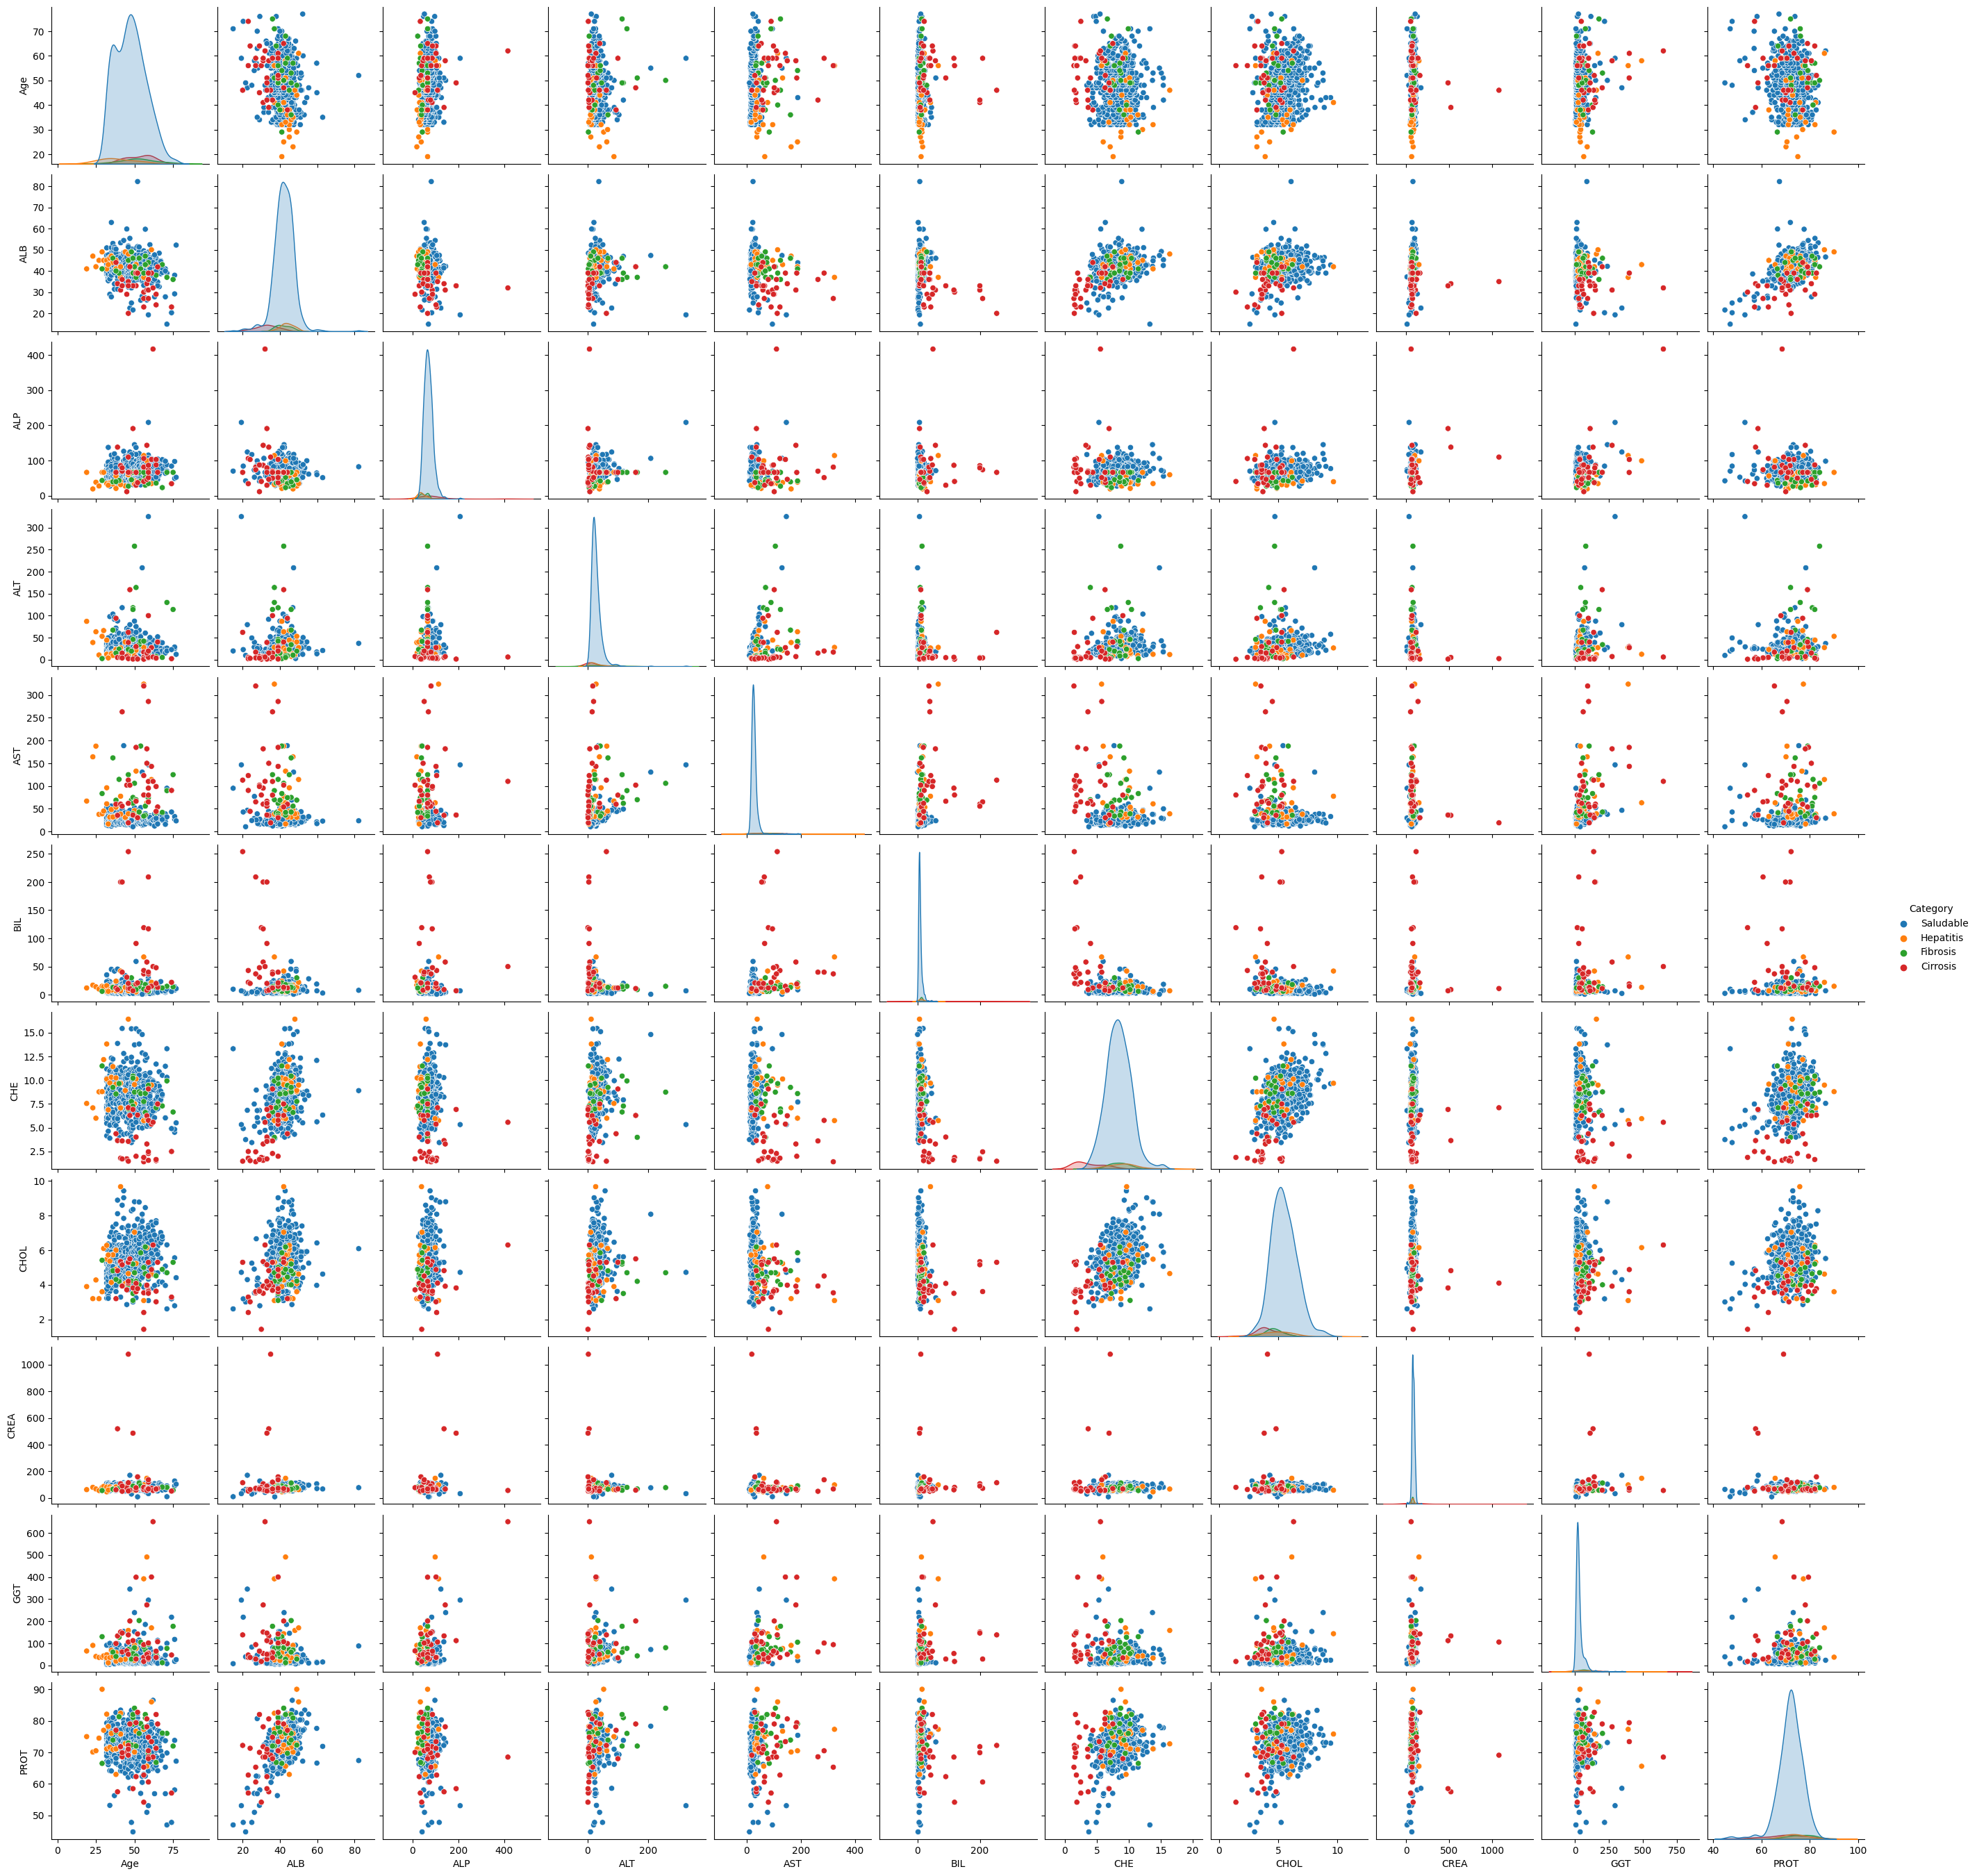

In [ ]:
sns.pairplot(data, hue="Category")

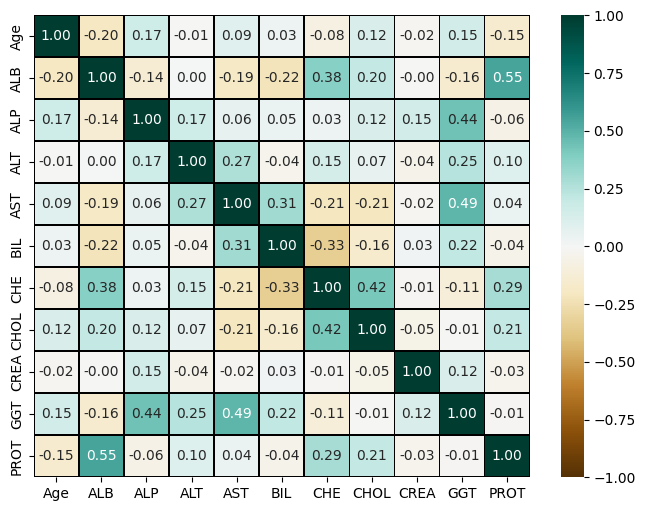

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data.corr(), vmin=-1, vmax=1,annot=True, fmt=".2f", cmap="BrBG", cbar=True, linewidths=0.5, linecolor='black');

# **4. Transformación y preparación de los datos**

## **4.1. Formato y Balanceo de datos**

In [ ]:
#@title Dar formato a las variables categóricas
data['Category'] = data['Category'].map({'Saludable': 0,
                                         'Hepatitis': 1,
                                         'Fibrosis': 2,
                                         'Cirrosis':3})

data['Sex'] = data['Sex'].map({'Masculino': 0, 'Femenino': 1})

Se saca una nueva correlación entre las variables, luego de que las variables categoricas fueron convertidas valores numéricos, con el fin de conocer la correlación entre las variables numericas y la variable "Category"

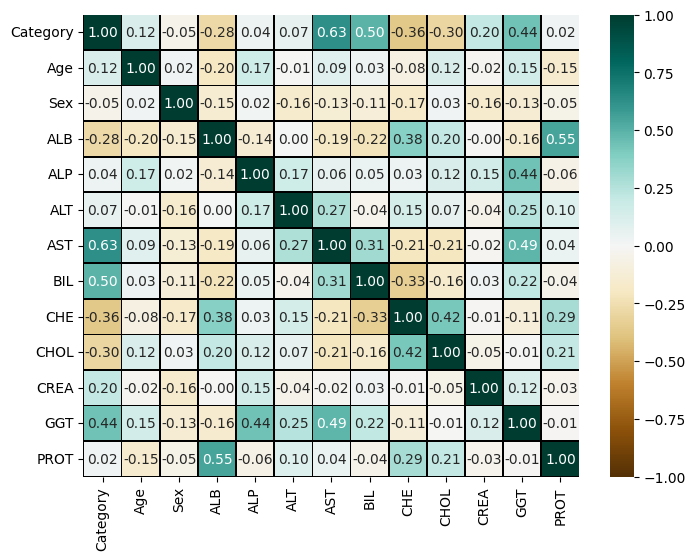

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data.corr(), vmin=-1, vmax=1,annot=True, fmt=".2f", cmap="BrBG", cbar=True, linewidths=0.5, linecolor='black');

In [ ]:
data

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3,46,1,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


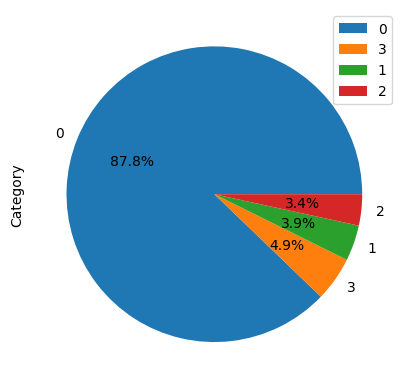

In [ ]:
data.Category.value_counts().plot(kind='pie', legend=True,style=list, autopct='%1.1f%%')

In [ ]:
#@title Aplicación de SMOTE para el balanceo del dataset

X = data.drop("Category", axis=1)
y = data["Category"]
sm = SMOTE(random_state=8)
X_sm, y_sm =sm.fit_resample(X,y)

data_X_sm = pd.DataFrame(data=X_sm, columns=X.columns)
data_y_sm = pd.DataFrame(data=y_sm, columns=["Category"])
data.bal_sm=pd.concat([data_X_sm, data_y_sm], axis=1)

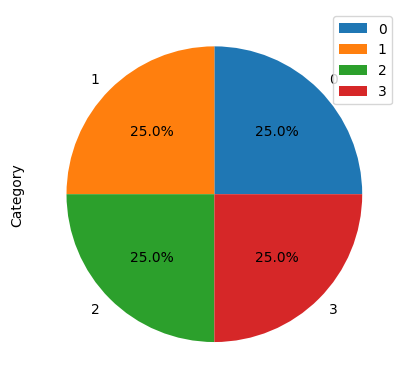

In [ ]:
data.bal_sm.Category.value_counts().plot(kind='pie', legend=True,style=list, autopct='%1.1f%%')

## **4.2. División deL dataset para entrenamiento y prueba**

In [ ]:
X_bal=data.bal_sm.drop("Category", axis=1)
y_bal=data.bal_sm["Category"]

X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, test_size=0.20, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_bal = scaler.fit_transform(X_train_bal)
X_test_bal = scaler.transform(X_test_bal)

print("Tamaño del conjunto de entrenamiento", X_train_bal.shape)
print("Tamaño del conjunto de prueba", X_test_bal.shape)

Tamaño del conjunto de entrenamiento (1728, 12)
Tamaño del conjunto de prueba (432, 12)


#**5. Modelos de Predicción**

##**5.1.Regresión Logística**



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
rl = LogisticRegression(penalty="l2", solver="lbfgs",max_iter=10000)
rl.fit(X_train_bal, y_train_bal)

print(rl.score(X_train_bal, y_train_bal))
print(rl.score(X_test_bal, y_test_bal))

0.8767361111111112
0.8773148148148148


In [ ]:
LogisticRegressionScore = rl.score(X_test_bal, y_test_bal)
print("Accuracy:",LogisticRegressionScore*100)

Accuracy: 87.73148148148148


In [ ]:
from sklearn import metrics
y_pred_rl = rl.predict(X_test_bal)
print(metrics.classification_report(y_test_bal,y_pred_rl ))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       114
           1       0.85      0.83      0.84       106
           2       0.79      0.85      0.82       105
           3       0.96      0.92      0.94       107

    accuracy                           0.88       432
   macro avg       0.88      0.88      0.88       432
weighted avg       0.88      0.88      0.88       432



##**5.2. K-Nearest-Neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_bal, y_train_bal)

y_pred_knn = knn.predict(X_test_bal)
y_train_pred = knn.predict(X_train_bal)

print(accuracy_score(y_train_bal, y_train_pred))
print(accuracy_score(y_test_bal, y_pred_knn))

0.9872685185185185
0.9791666666666666


Se aplica el motodo del codo para esoger el k. Se concluye que los "K" con menor error pueden ser 1 y 3

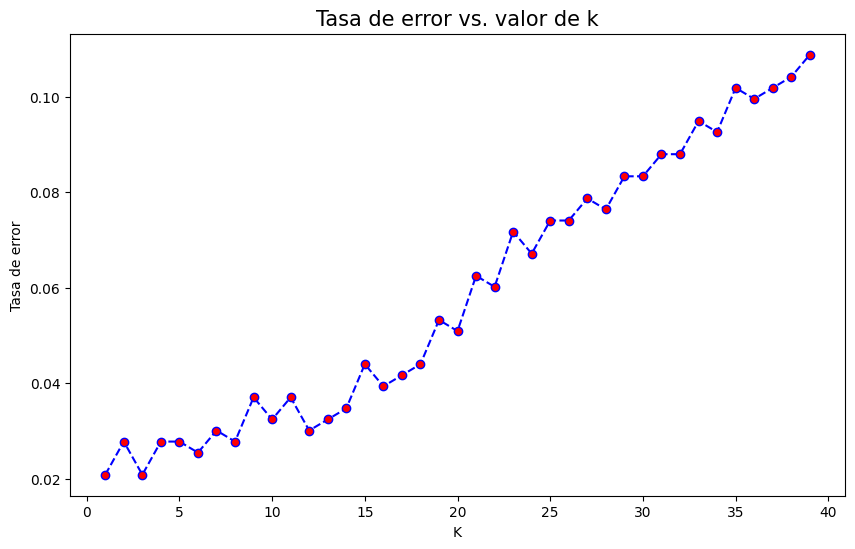

In [ ]:
error_rate = []
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_bal,y_train_bal)
    pred_i = knn.predict(X_test_bal)
    error_rate.append(np.mean(pred_i != y_test_bal))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=6)
plt.title("Tasa de error vs. valor de k", fontsize=15)
plt.xlabel("K", fontsize=10)
plt.ylabel("Tasa de error", fontsize=10)
plt.show()

In [ ]:
KNeighborsClassifierScore = knn.score(X_test_bal, y_test_bal)
print("Accuracy:", KNeighborsClassifierScore*100)
print(metrics.classification_report(y_test_bal,y_pred_knn))

Accuracy: 89.12037037037037
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       114
           1       0.95      0.99      0.97       106
           2       0.98      0.99      0.99       105
           3       0.98      1.00      0.99       107

    accuracy                           0.98       432
   macro avg       0.98      0.98      0.98       432
weighted avg       0.98      0.98      0.98       432



##**5.3. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train_bal, y_train_bal)
RandomForestClassifierScore = rfc.score(X_test_bal, y_test_bal)

#Predicción y métricas 

#predecir y probar nuestro modelo
y_train_pred = rfc.predict(X_train_bal)
y_pred_rfc = rfc.predict(X_test_bal)

from sklearn.metrics import balanced_accuracy_score, f1_score

# verificando aprendizaje
print("Aprendizaje - Entrenamiento")
print(balanced_accuracy_score(y_train_bal, y_train_pred))
print(f1_score(y_train_bal, y_train_pred, average="weighted"))

#verificando generalización
print("Prueba - Generalización")
print(balanced_accuracy_score(y_test_bal, y_pred_rfc))
print(f1_score(y_test_bal, y_pred_rfc, average="weighted"))

Aprendizaje - Entrenamiento
1.0
1.0
Prueba - Generalización
0.9888916215773077
0.9883971889238202


In [ ]:
RandomForestClassifierScore = rfc.score(X_test_bal,y_test_bal)
print("Accuracy:", RandomForestClassifierScore*100)

Accuracy: 98.8425925925926


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
conf_mat=confusion_matrix(y_test_bal,y_pred_rfc)
print(conf_mat)

[[110   3   0   1]
 [  0 106   0   0]
 [  0   0 105   0]
 [  0   0   1 106]]


In [ ]:
print(metrics.classification_report(y_test_bal, y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       114
           1       0.97      1.00      0.99       106
           2       0.99      1.00      1.00       105
           3       0.99      0.99      0.99       107

    accuracy                           0.99       432
   macro avg       0.99      0.99      0.99       432
weighted avg       0.99      0.99      0.99       432



##**5.4. Comparación de modelos**

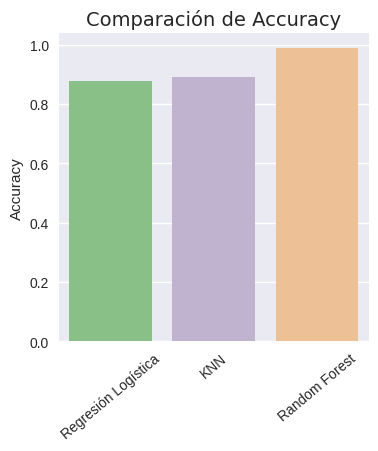

In [ ]:
plt.style.use("seaborn")

x = ["Regresión Logística", "KNN", "Random Forest"]

y = [LogisticRegressionScore, KNeighborsClassifierScore, RandomForestClassifierScore]

fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(x=x,y=y, palette="Accent");
plt.ylabel("Accuracy")
plt.xticks(rotation=40)
plt.title("Comparación de Accuracy", fontsize=14, fontname="Helvetica", y=1);

#**6. Conclusiones**



**1.**   Evaluando los 3 modelos de predicción utilizados se puede decir que **Random Forest** es el modelo más idóneo para este caso, dado su nivel de accuracy es el más alto de los 3 modelos evaluados, el cual hace referencia a cuan bien puede predecir.

**2.**  A pesar de que **Regresión Logistica** es el modelo con menor exactitud entre los 3 modelos de predicción utilizados, se puede indicar que es idóneo en el caso de que se quiera utilizar para identificar pacientes que padecen Cirrosis.

**3.**   Es necesario balancear el dataset debido a que se tenia una clase muy superior al resto, esto podria traer como consecuencias a que el algoritmo generado no pueda pueda predecir adecuadamente y caer en overfitting. 

**4.**   Como mejora futura se puede proponer enfocar esta investigación en la detección de pacientes con cirrosis, utilizando como variable principal la **enzima AST**, dado que esta encima tiene mucha relevancia en la salud del higado. Así como también se podria cambiar el enfoque y buscar dectar si el donante puede estar contagiado de VHC basado en el Cociente AST/ALT.
